In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import glob

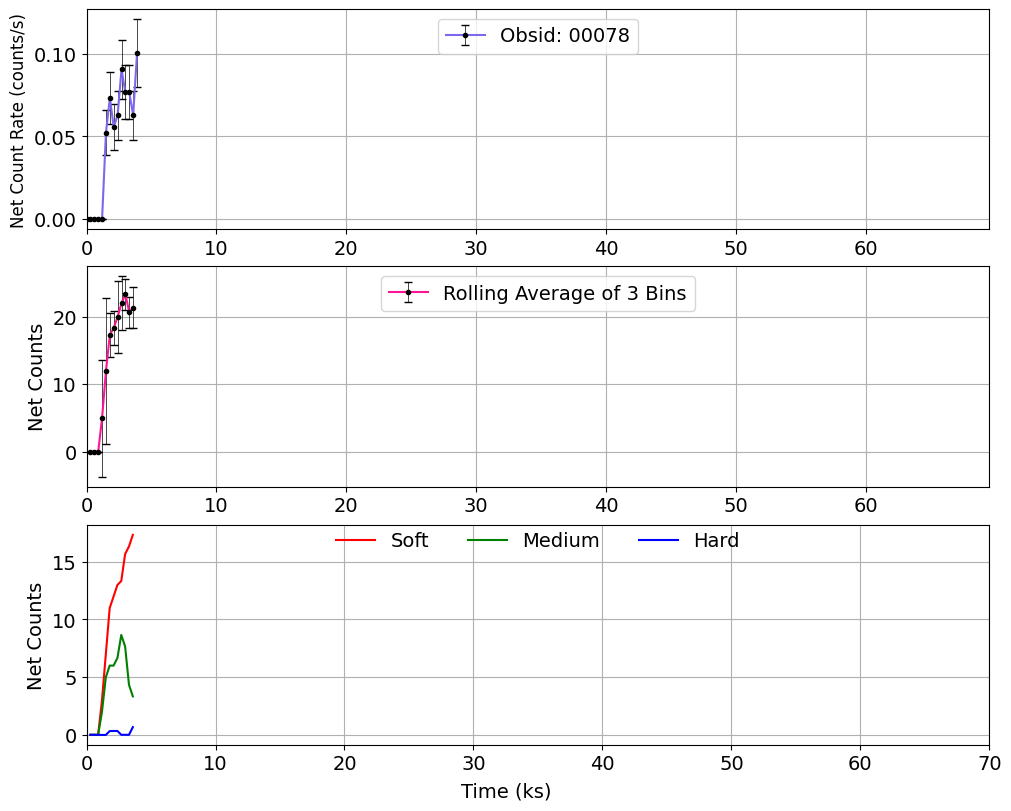

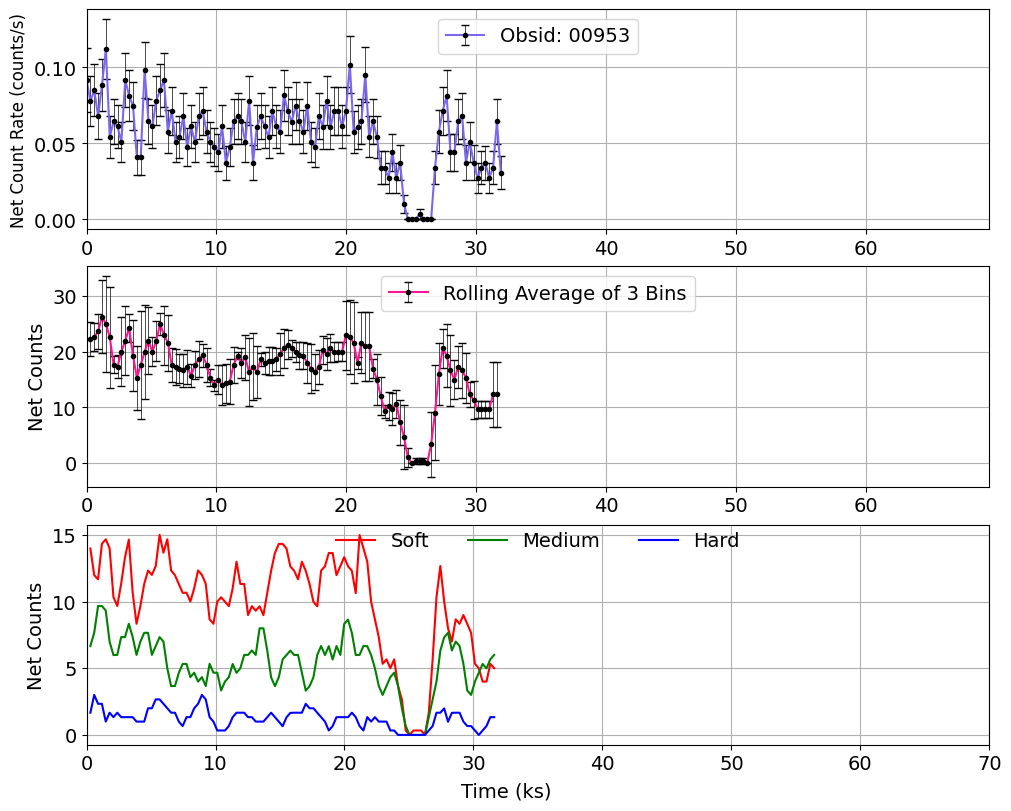

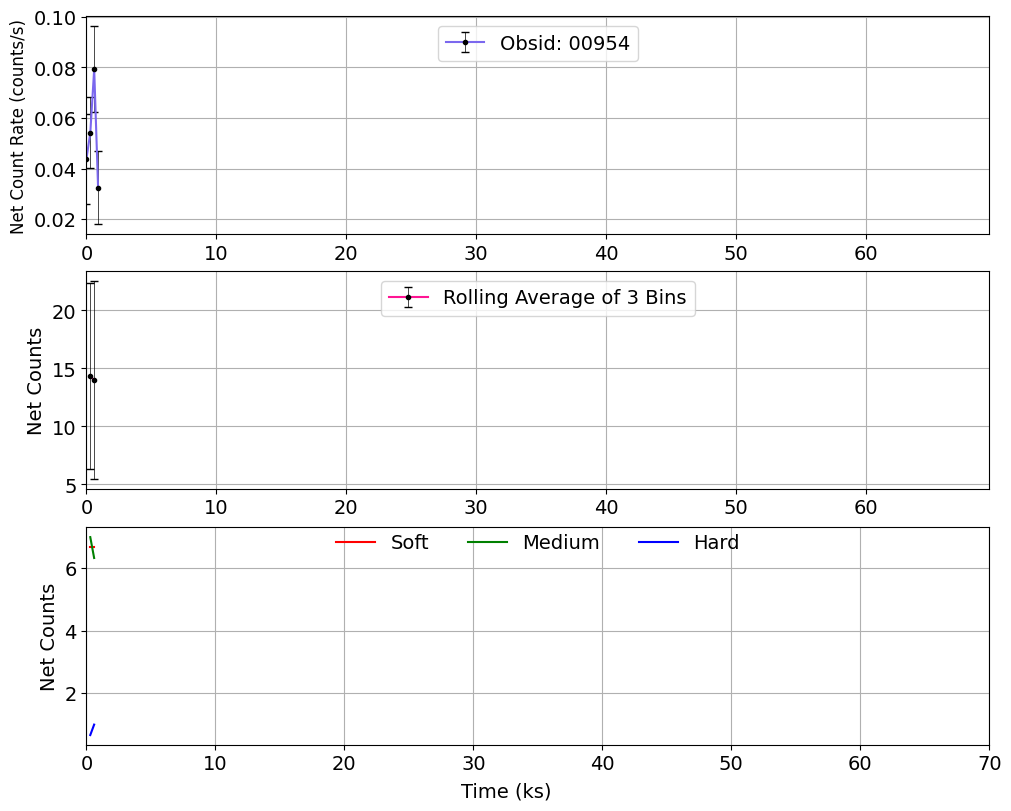

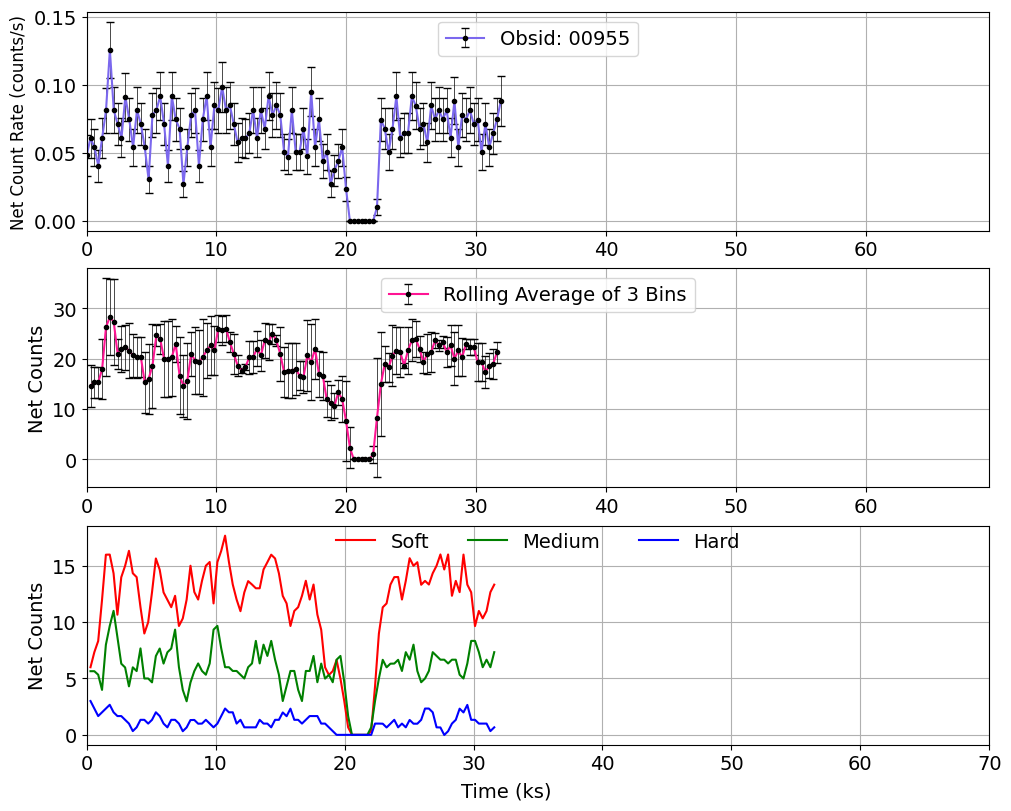

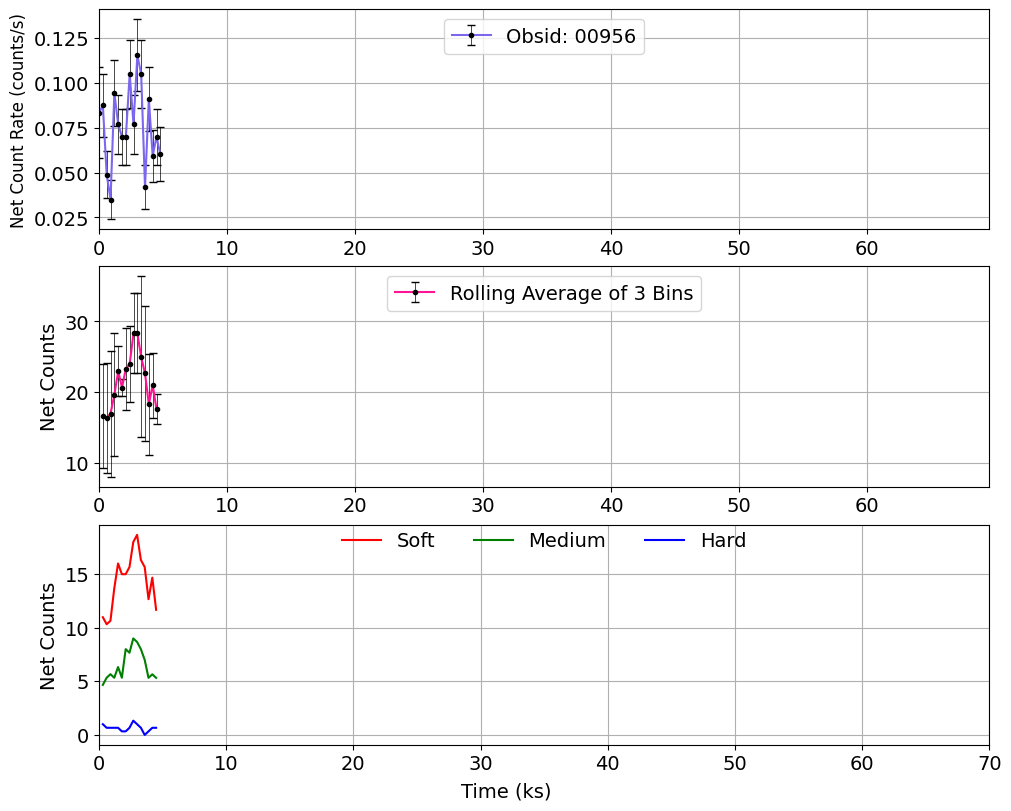

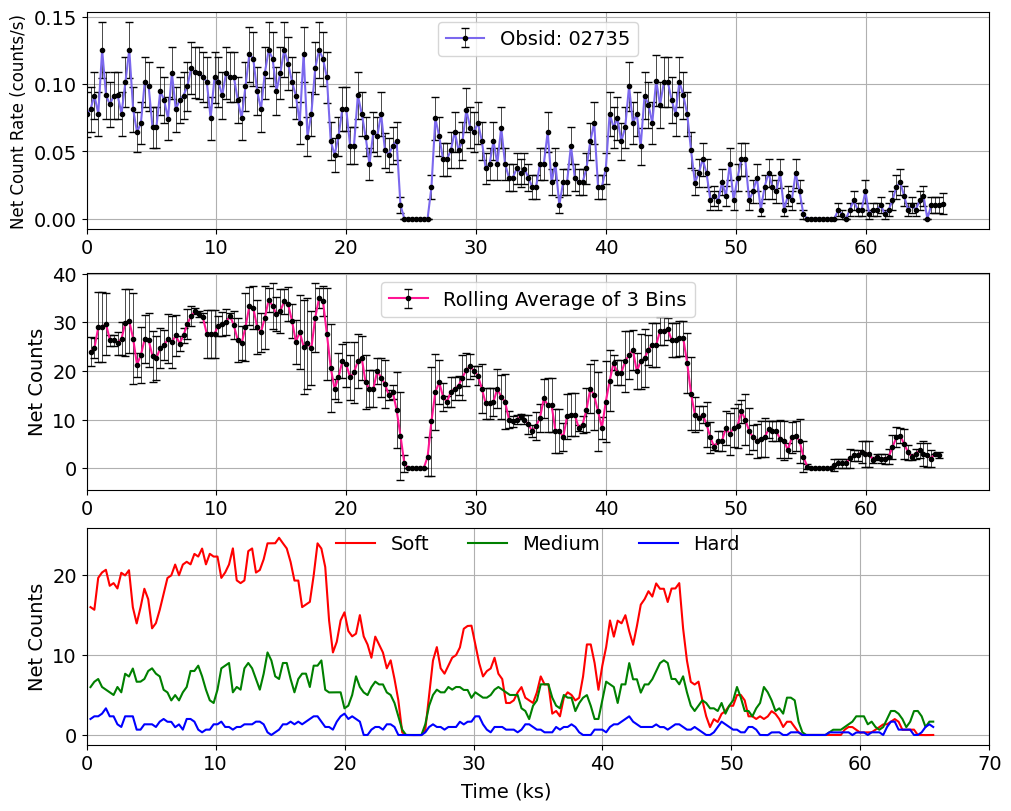

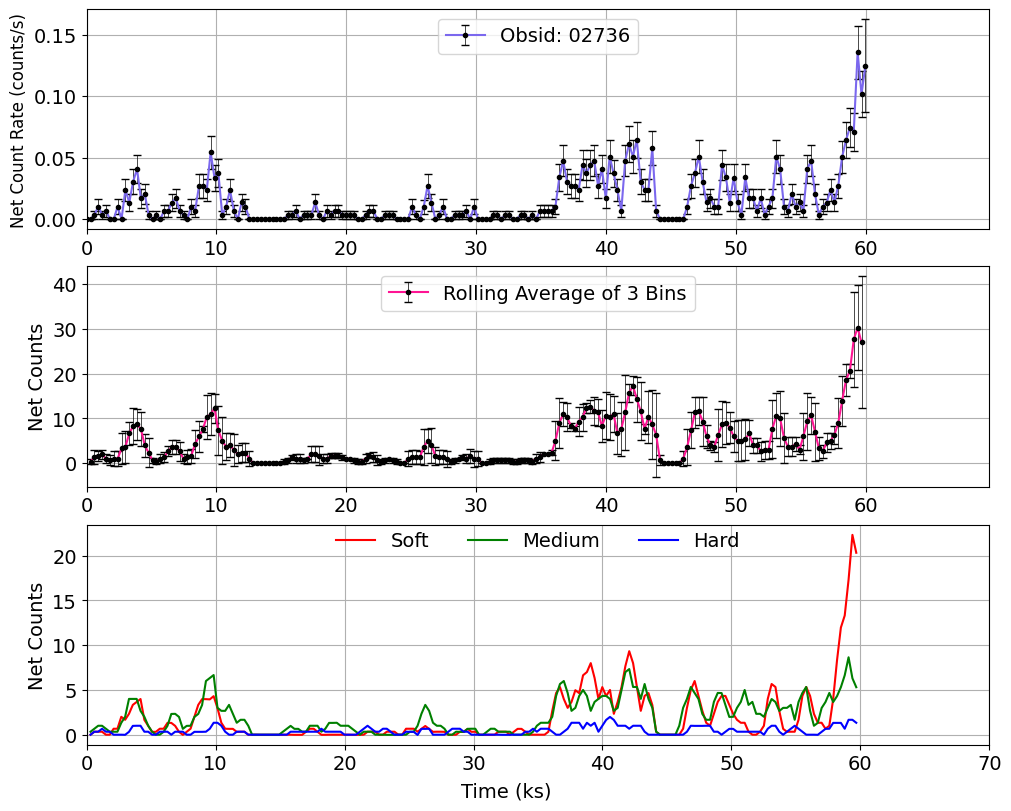

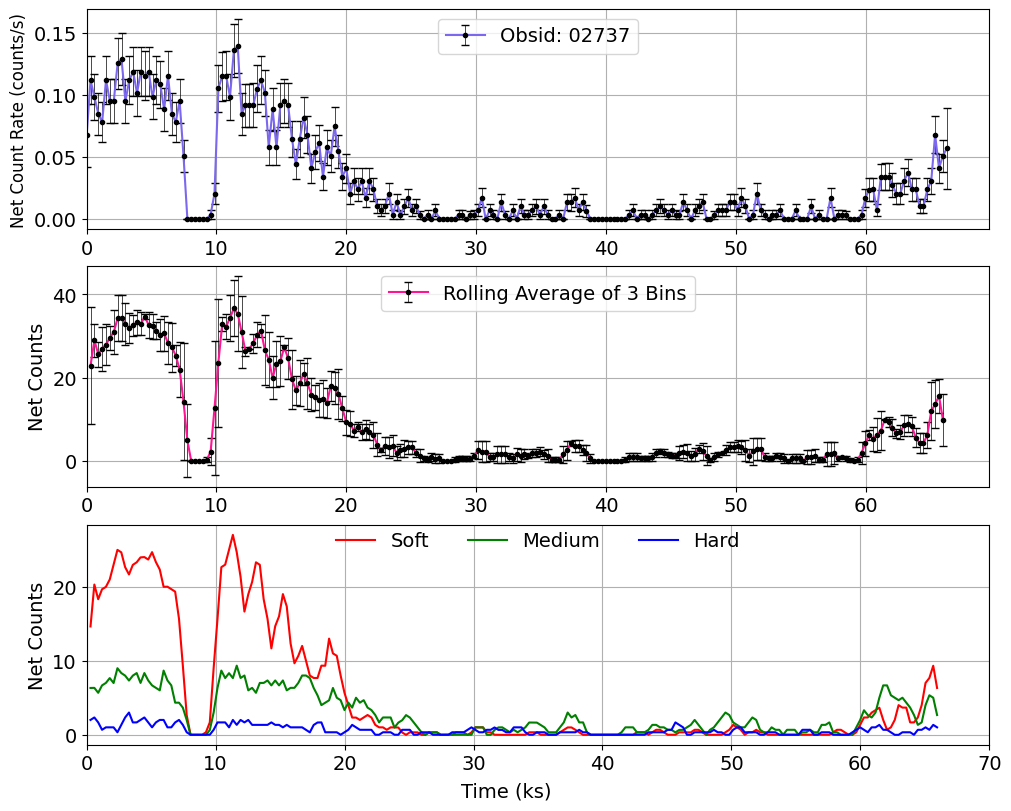

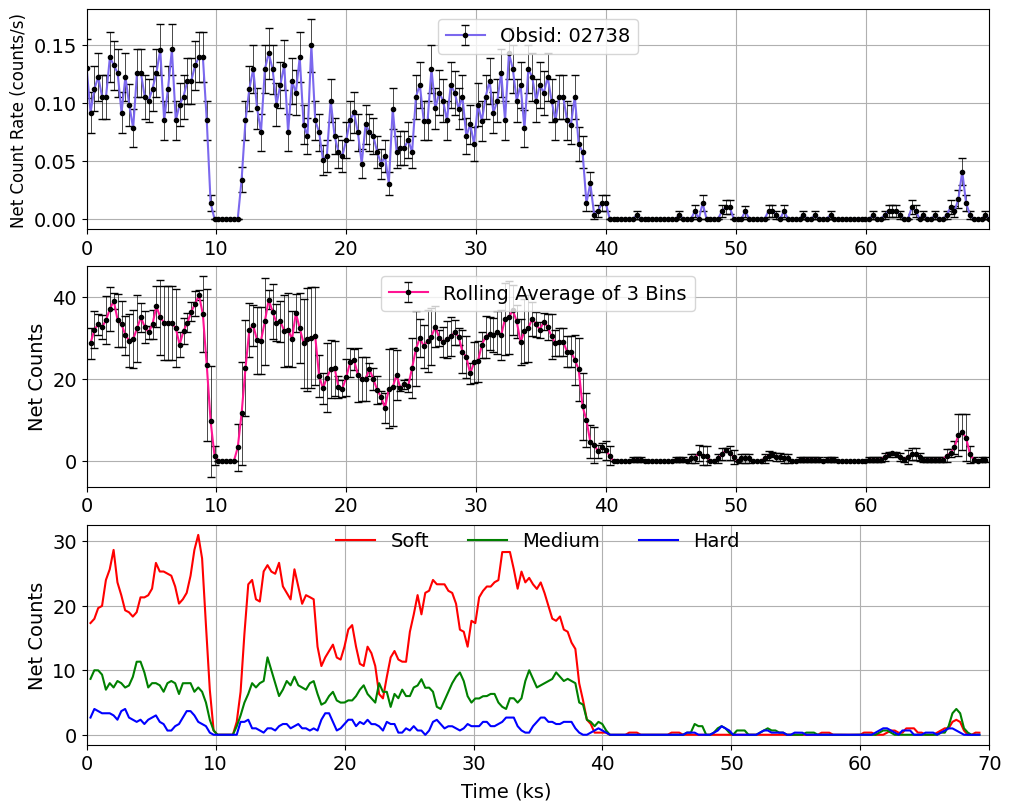

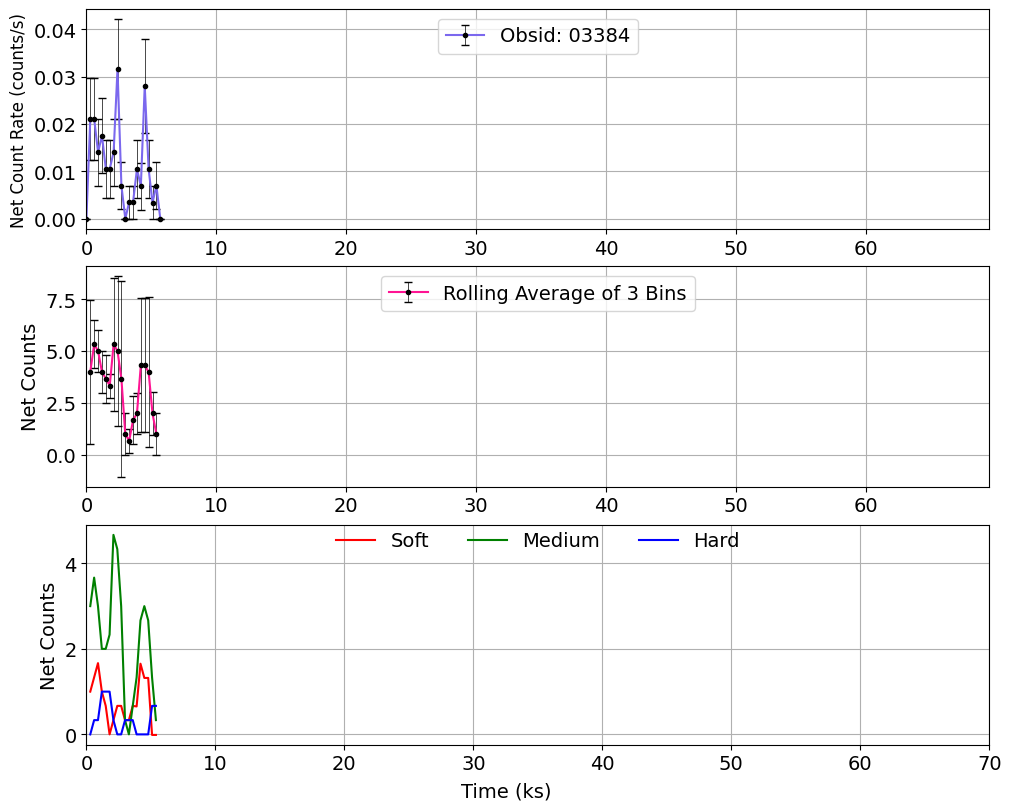

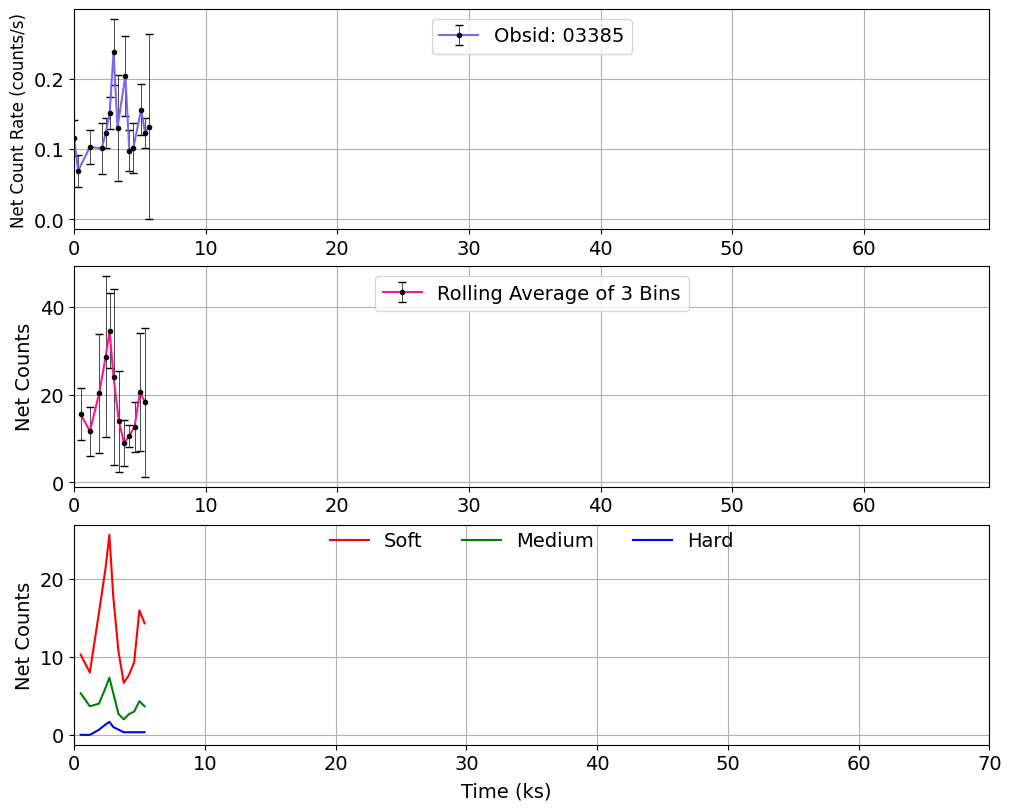

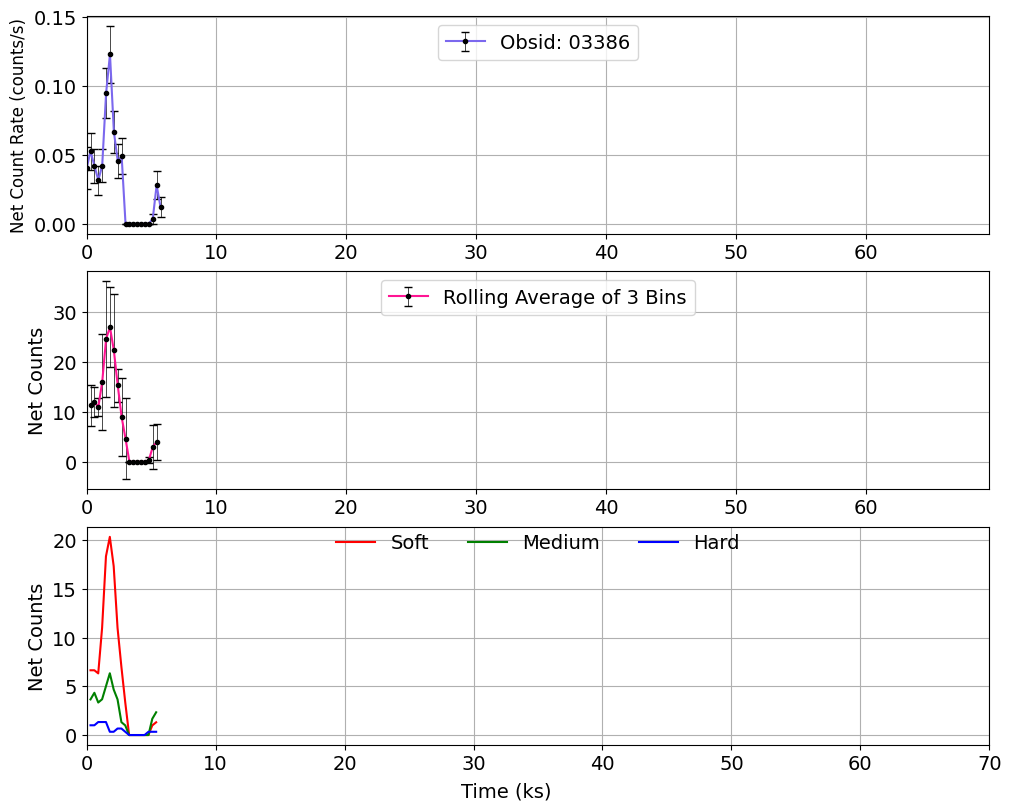

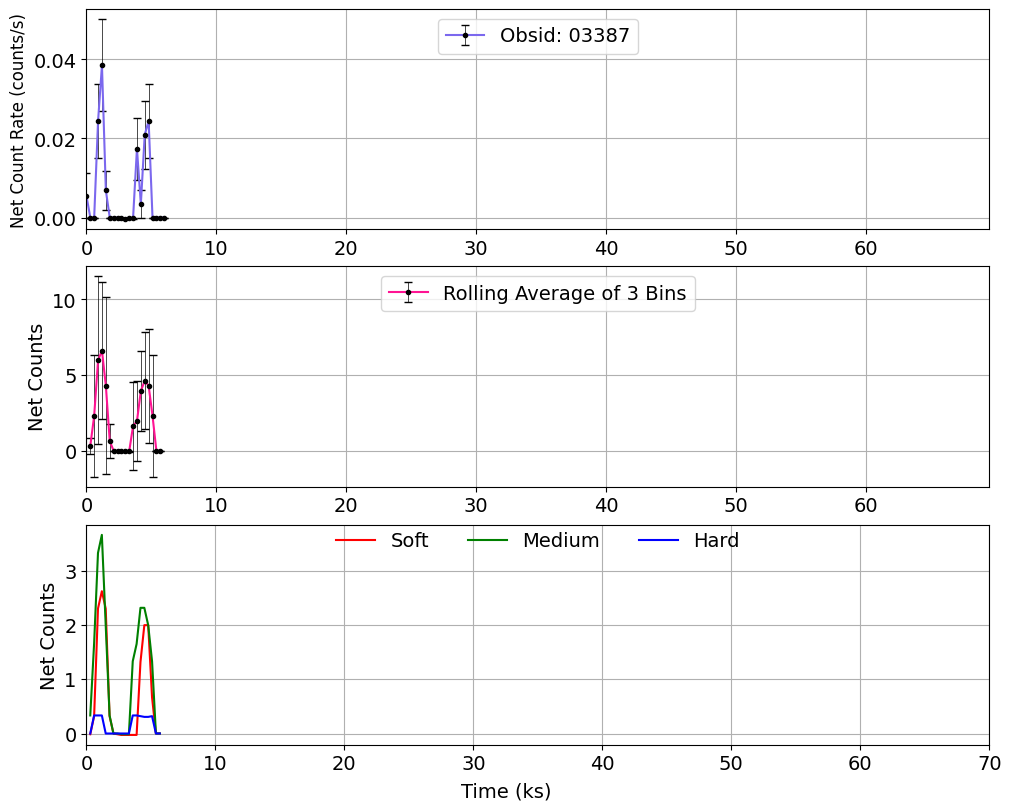

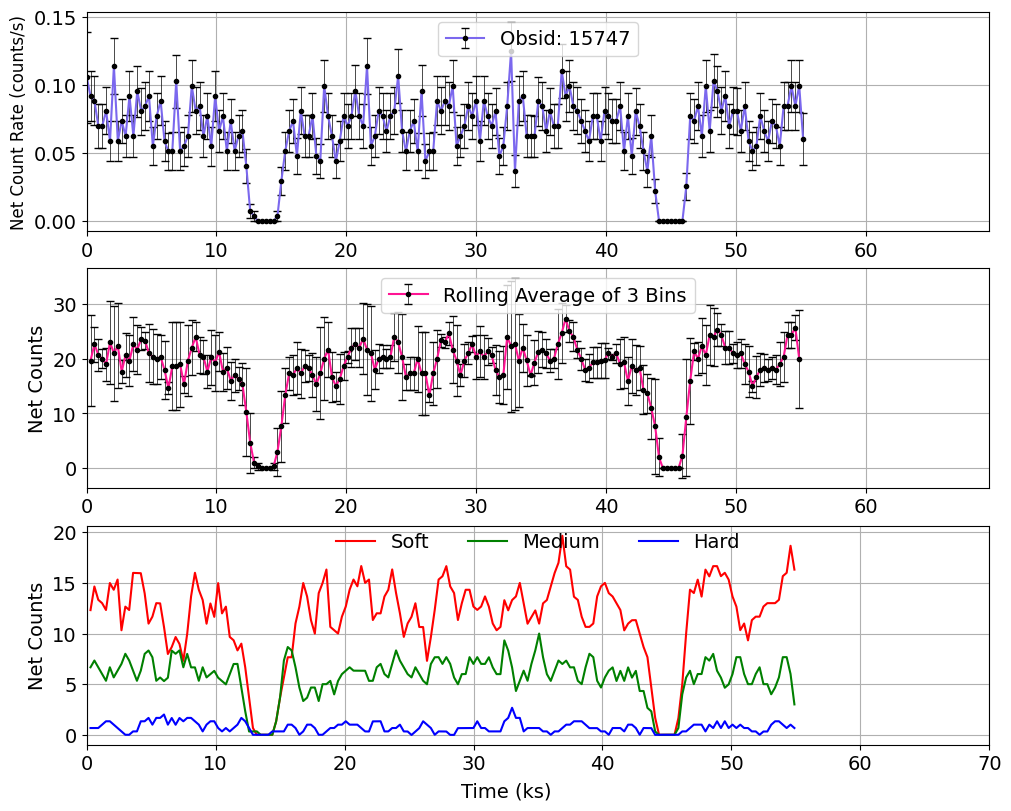

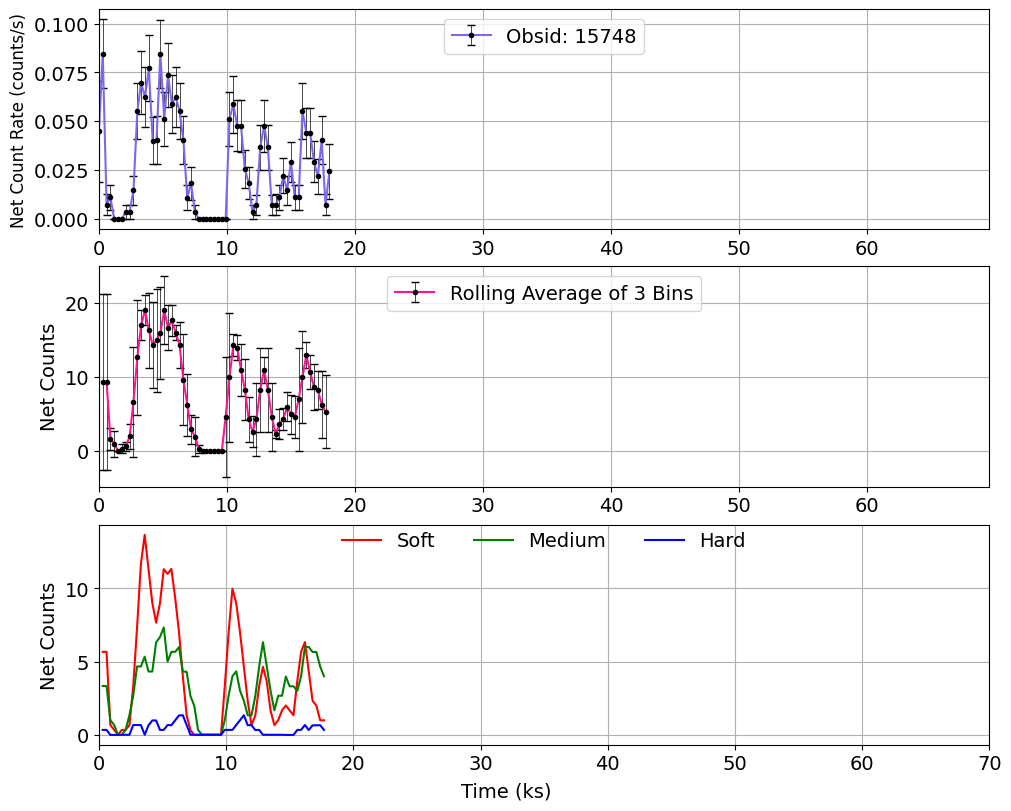

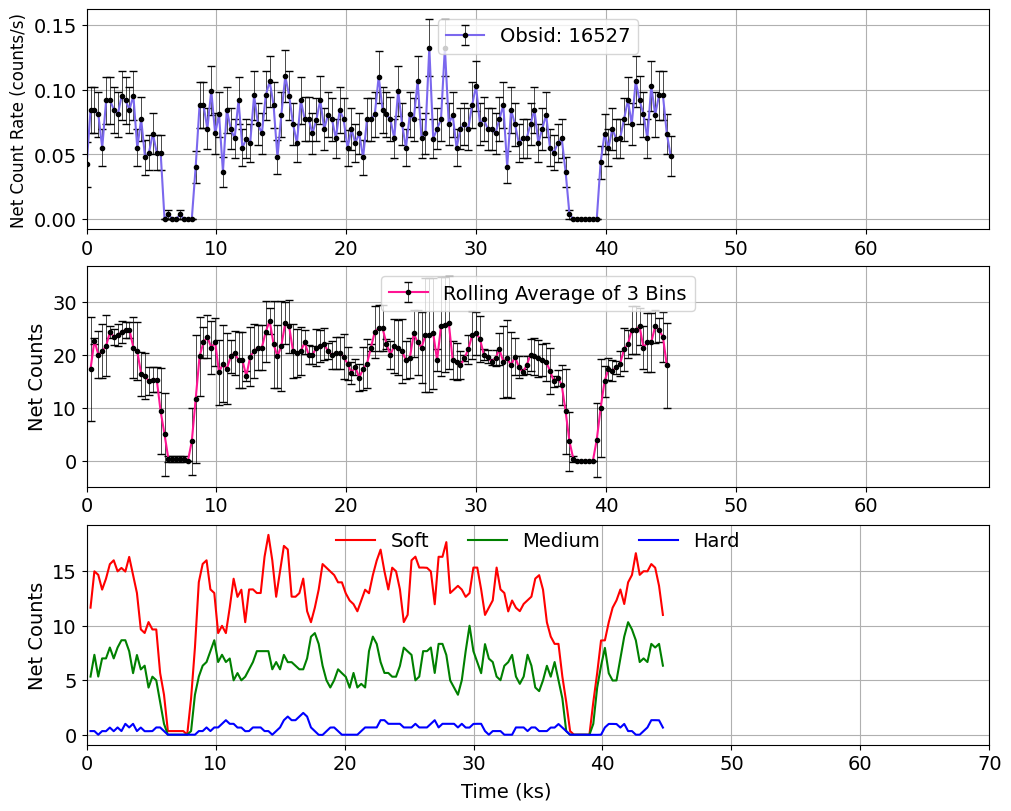

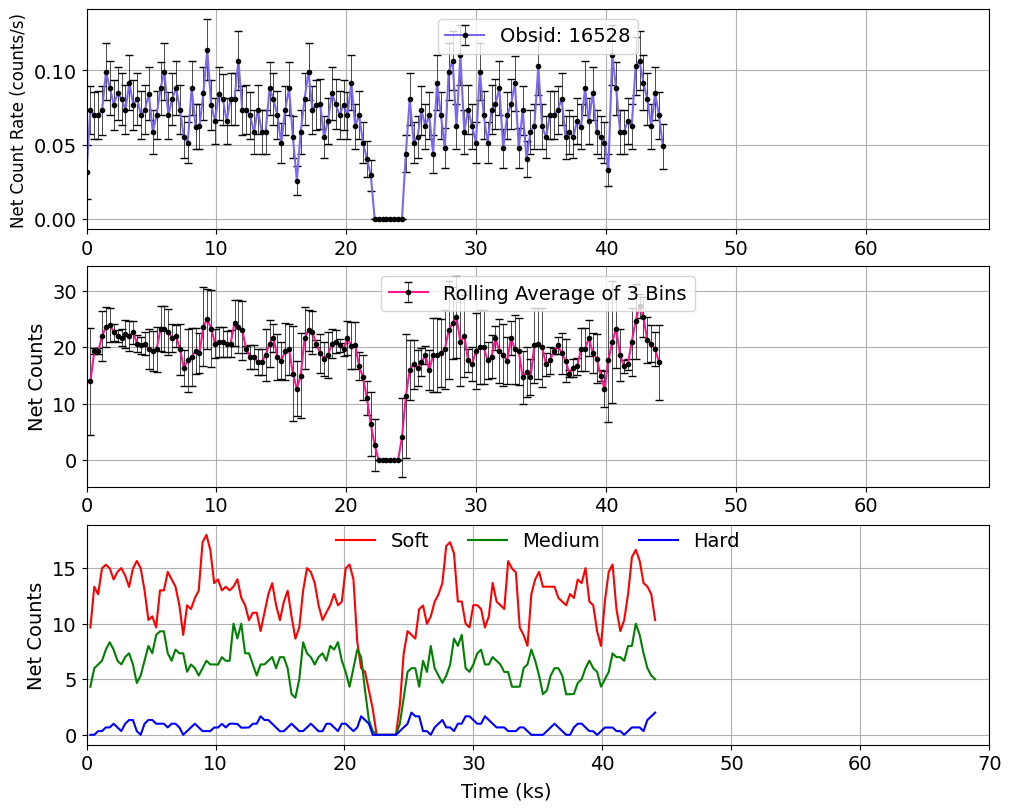

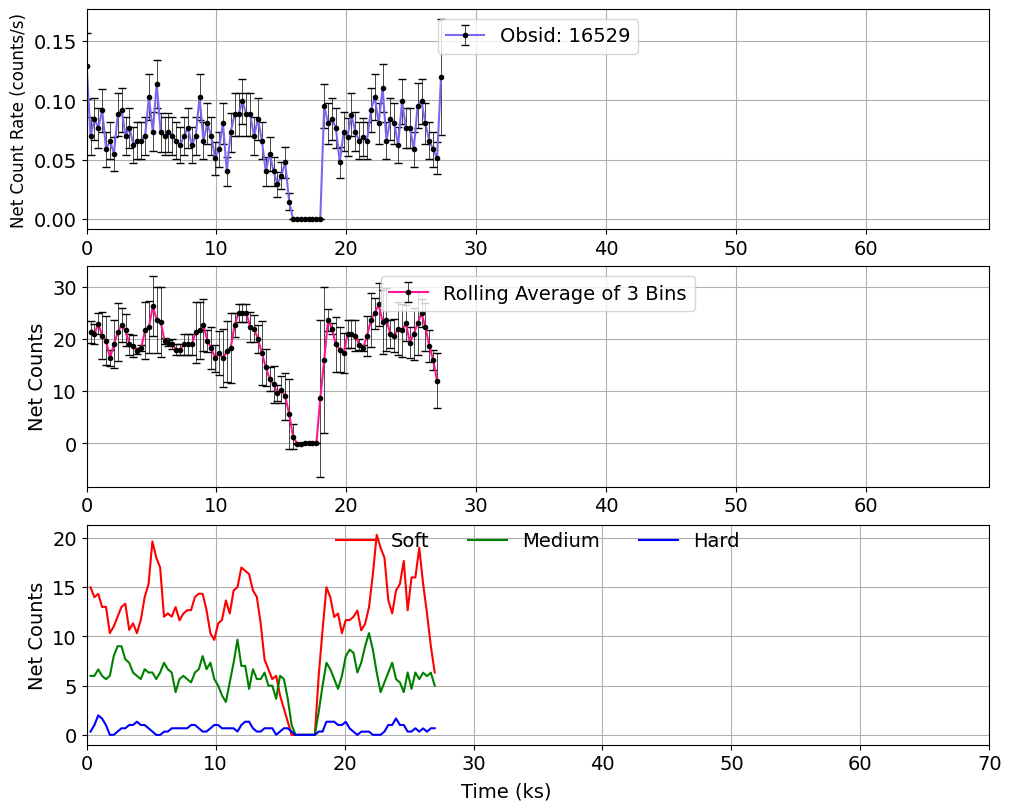

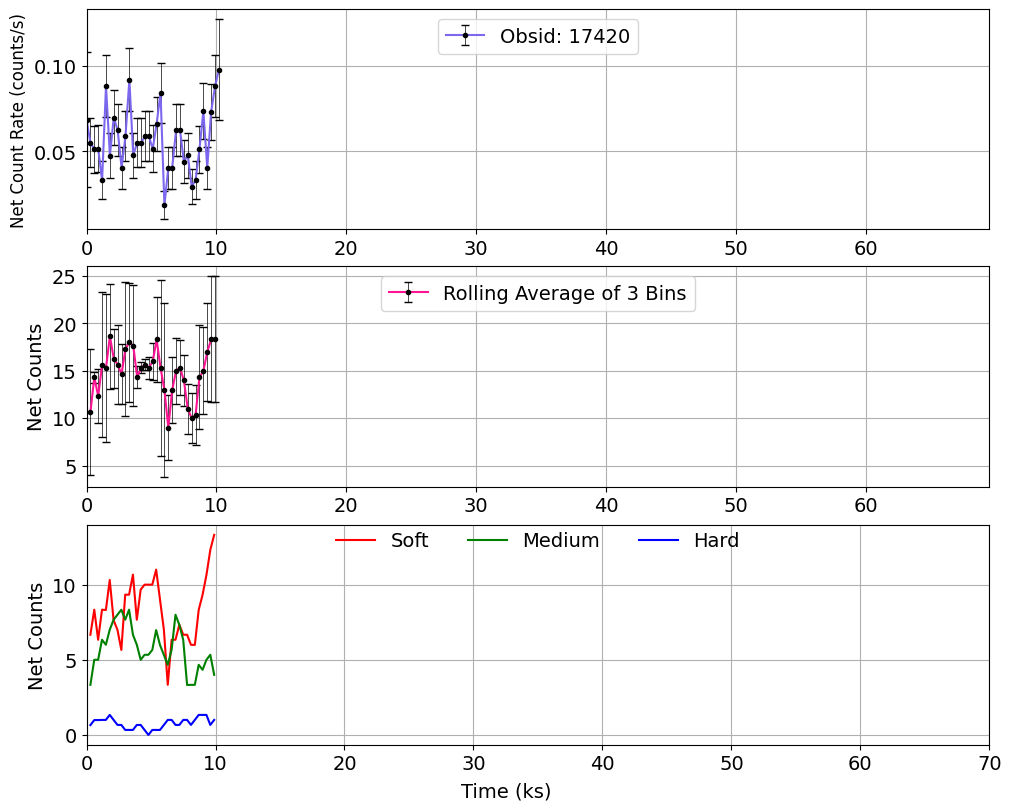

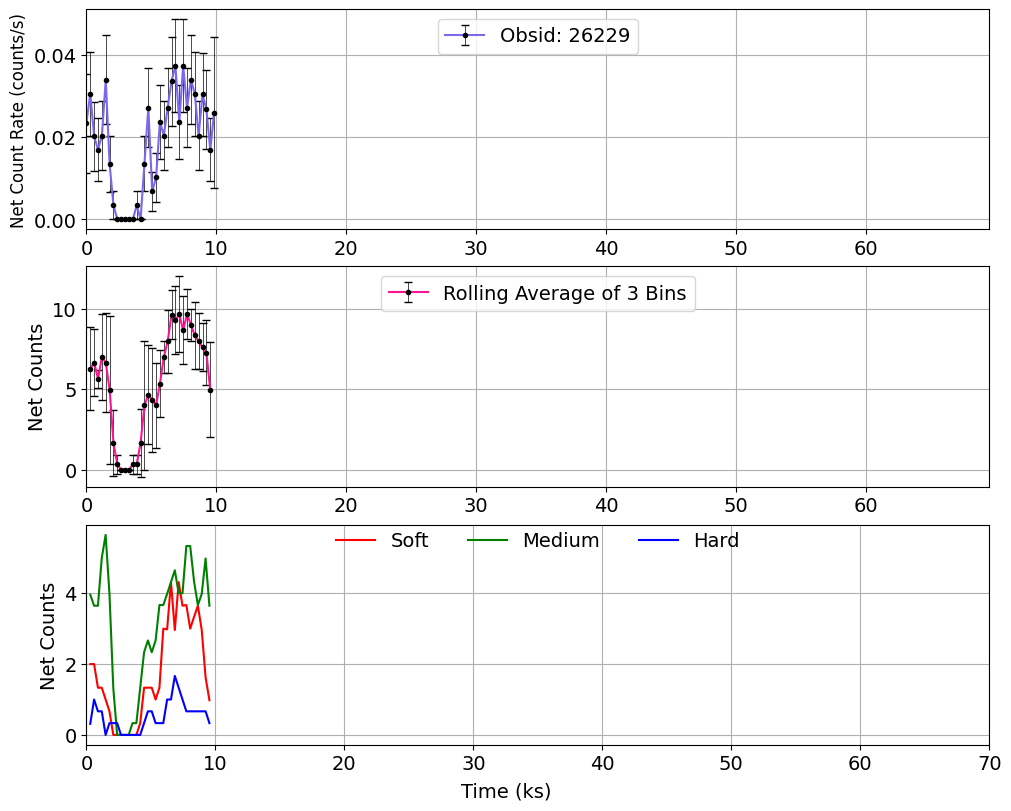

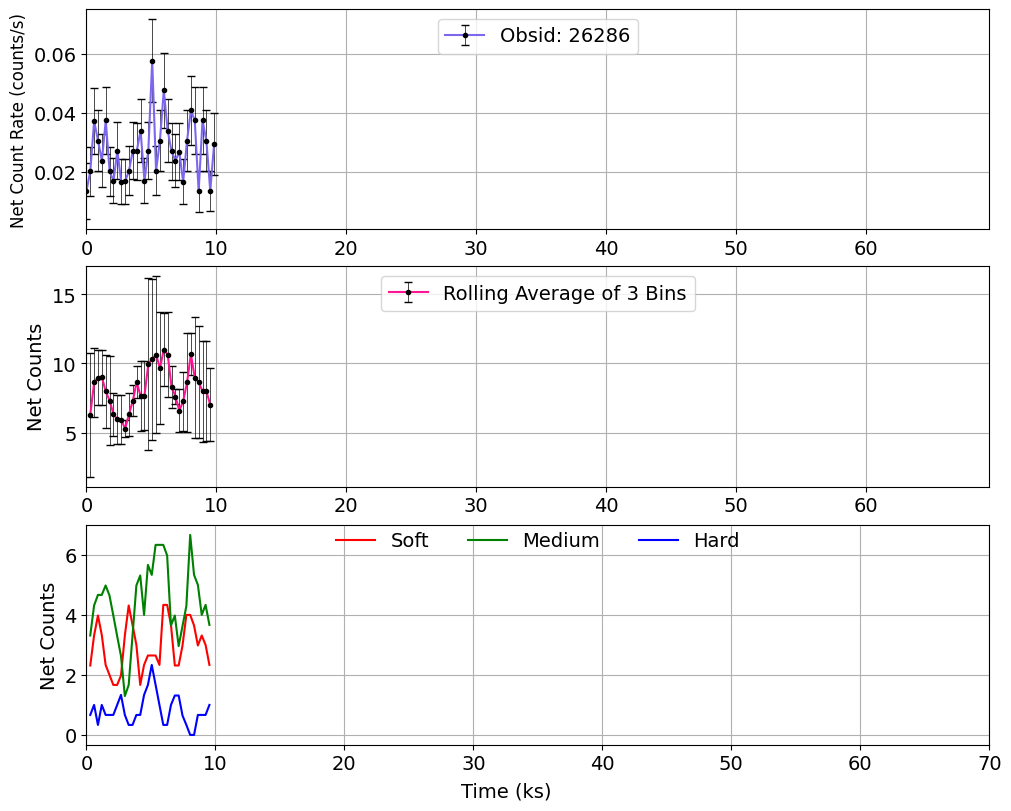

In [35]:
broad_files = sorted(glob.glob('./my_source/2CXO_J002400.9-720453/acis*b.lc.txt'))
soft_files = sorted(glob.glob('./my_source/2CXO_J002400.9-720453/acis*s.lc.txt'))
medium_files = sorted(glob.glob('./my_source/2CXO_J002400.9-720453/acis*m.lc.txt'))
hard_files = sorted(glob.glob('./my_source/2CXO_J002400.9-720453/acis*h.lc.txt'))
#bintime_files = sorted(glob.glob(f'{source}/*bintime.txt'))
#directory_name = os.path.basename(source.rstrip('/'))

all_files = np.stack((broad_files, soft_files, medium_files, hard_files), axis=1)

durations = []

for file in all_files:

    broad_data = np.loadtxt(file[0])
    soft_data = np.loadtxt(file[1])
    medium_data = np.loadtxt(file[2])
    hard_data = np.loadtxt(file[3])

    data_stack = np.stack((broad_data, soft_data, medium_data, hard_data), axis=1)
    
    filtered = []
    for idx, data_stack_i in enumerate(data_stack):
        array = data_stack[idx]
        if array[0][4] != 0:
            filtered.append(array)
    filtered_new = np.array(filtered)

    bd = filtered_new[:,0]

    min_time = bd[:,0].min()
    max_time = bd[:,0].max()
    durations.append(max_time - min_time)

max_duration = max(durations)/1000

for file in all_files:

    broad_data = np.loadtxt(file[0])
    soft_data = np.loadtxt(file[1])
    medium_data = np.loadtxt(file[2])
    hard_data = np.loadtxt(file[3])
    #bintime = np.loadtxt(file[4])

    data_stack = np.stack((broad_data, soft_data, medium_data, hard_data), axis=1)
    
    filtered = []
    for idx, data_stack_i in enumerate(data_stack):
        array = data_stack[idx]
        if array[0][4] != 0:
            filtered.append(array)
    filtered_new = np.array(filtered)

    bd = filtered_new[:,0]
    sd = filtered_new[:,1]
    md = filtered_new[:,2]
    hd = filtered_new[:,3]

    min_time = bd[:,0].min()
    time_data = (bd[:,0] - min_time)/1000

    #obsid = file[0][-41:-36]
    obsid = file[0][39:44]
    #regid = file[0][-26:-22]

    df = pd.DataFrame({'Time': time_data, 'Net Counts': bd[:,3], 'Soft': sd[:,3], 'Medium': md[:,3], 'Hard': hd[:,3]})
    df_rolling = df.rolling(window=3, center=True).mean()
    rolling_std = df.rolling(window=3, center=True).std()

    fig, axs = plt.subplots(3, 1, figsize=(10, 8), constrained_layout = True)

    axs[0].errorbar(time_data, bd[:,1], yerr=bd[:,2], color = 'mediumslateblue', marker = 'o', elinewidth = 0.5, markerfacecolor = 'black', markersize = 3, ecolor = 'black', markeredgecolor = 'black', capsize=3)
    axs[0].set_xlim([0, max_duration])
    axs[0].set_ylabel('Net Count Rate (counts/s)', fontsize=12)
    axs[0].legend([f'Obsid: {obsid}'], loc='upper center', fontsize=14)
    axs[0].tick_params(axis='x', labelsize=14)
    axs[0].tick_params(axis='y', labelsize=14)
    axs[0].grid()
    
    axs[1].errorbar(df_rolling['Time'], df_rolling['Net Counts'], yerr=rolling_std['Net Counts'], color = 'deeppink', marker = 'o', elinewidth = 0.5, markerfacecolor = 'black', markersize = 3, ecolor = 'black', markeredgecolor = 'black', capsize=3)
    axs[1].set_xlim([0, max_duration])
    axs[1].set_ylabel('Net Counts', fontsize=14)
    axs[1].legend(['Rolling Average of 3 Bins'], loc='upper center', fontsize=14)
    axs[1].tick_params(axis='x', labelsize=14)
    axs[1].tick_params(axis='y', labelsize=14)
    axs[1].grid()
    
    axs[2].plot(df_rolling['Time'], df_rolling['Soft'], color='red', label='Soft')
    axs[2].plot(df_rolling['Time'], df_rolling['Medium'], color='green', label='Medium')
    axs[2].plot(df_rolling['Time'], df_rolling['Hard'], color = 'blue', label='Hard')
    axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon = False, fontsize = 14)
    axs[2].set_xlim([0, 70])
    axs[2].set_ylabel('Net Counts', fontsize =14)
    axs[2].tick_params(axis='x', labelsize=14)
    axs[2].tick_params(axis='y', labelsize=14)
    axs[2].grid()

    fig.supxlabel('Time (ks)', fontsize=14)
    #fig.suptitle(f'Rolling lightcurve for 2CXO J002400.9-720453: ObsID {obsid} with {bintime}s Bin size')
    plt.savefig(f'./my_source/{obsid}_paper_img.png', dpi=200, bbox_inches='tight')
    plt.show()

In [16]:
broad_files = sorted(glob.glob('./my_source/HRC_obs/*b.lc.txt'))
broad_files

['./my_source/HRC_obs/hrcf05542_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf05543_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf05544_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf05545_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf05546_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf06230_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf06231_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf06232_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf06233_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf06235_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf06236_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf06237_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf06238_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf06239_repro_evt2.fits.b.lc.txt',
 './my_source/HRC_obs/hrcf06240_repro_evt2.fits.b.lc.txt']

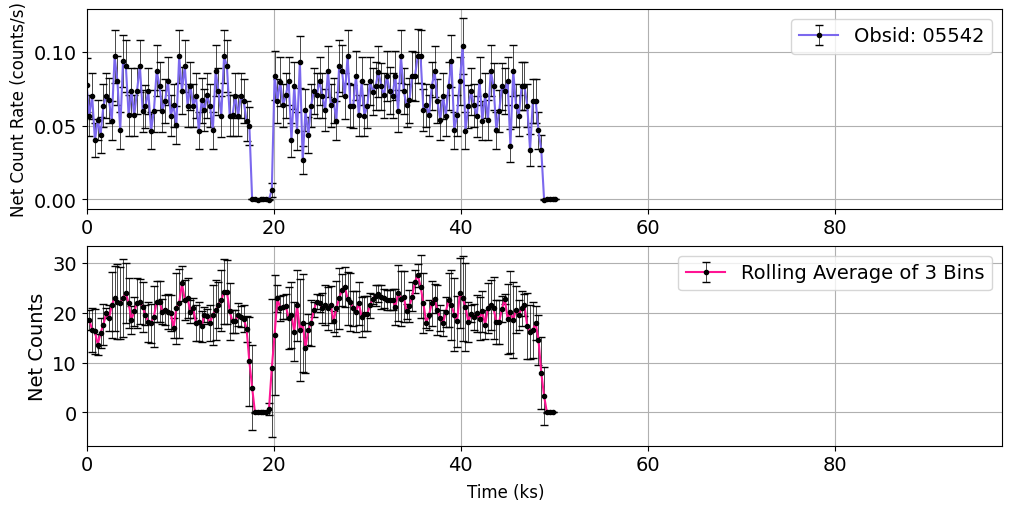

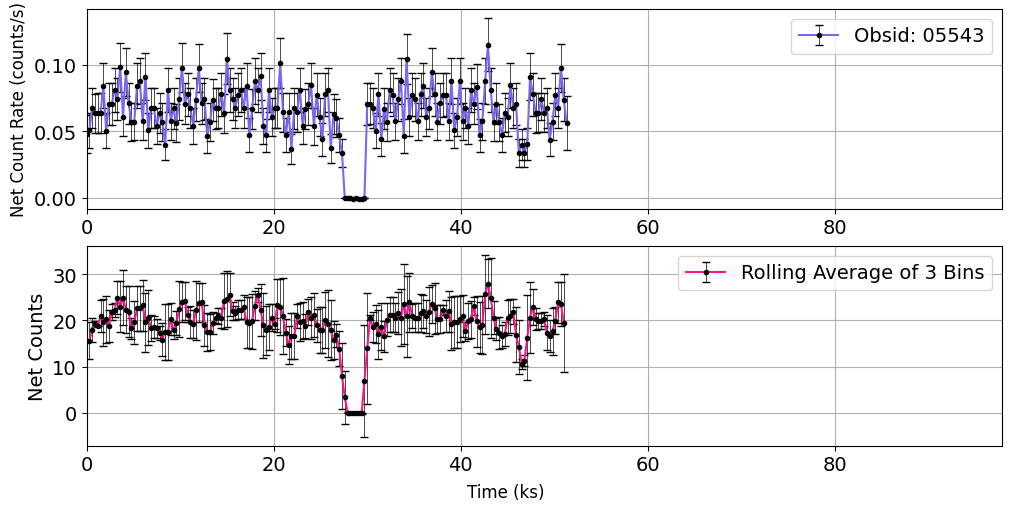

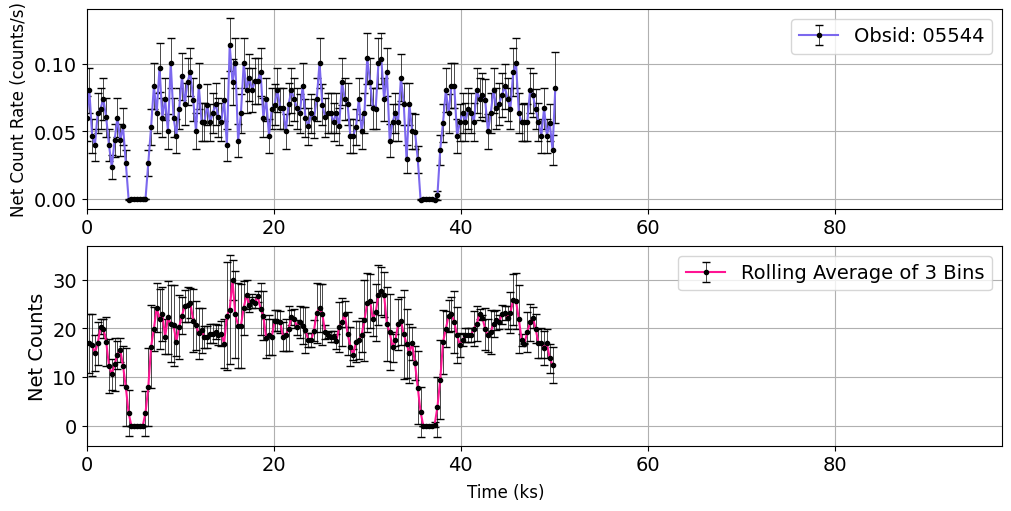

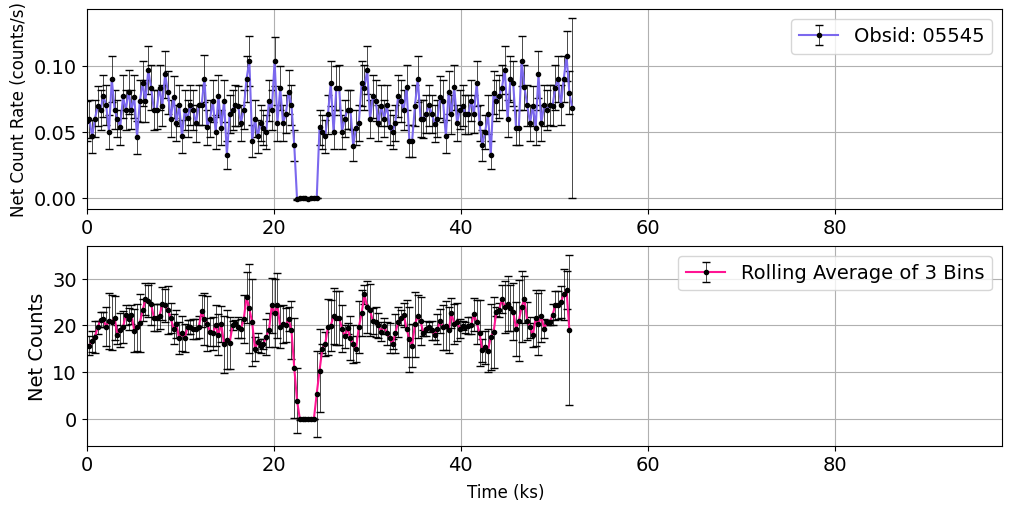

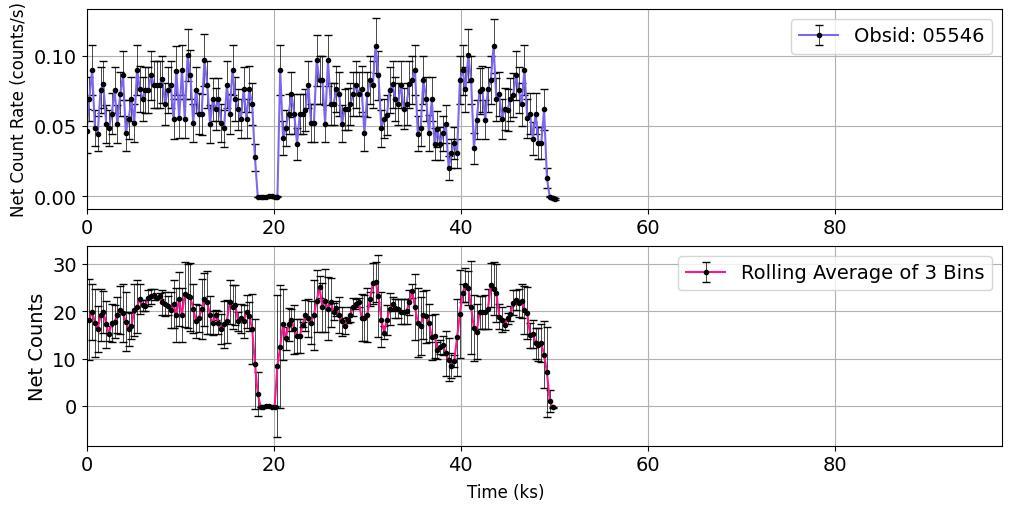

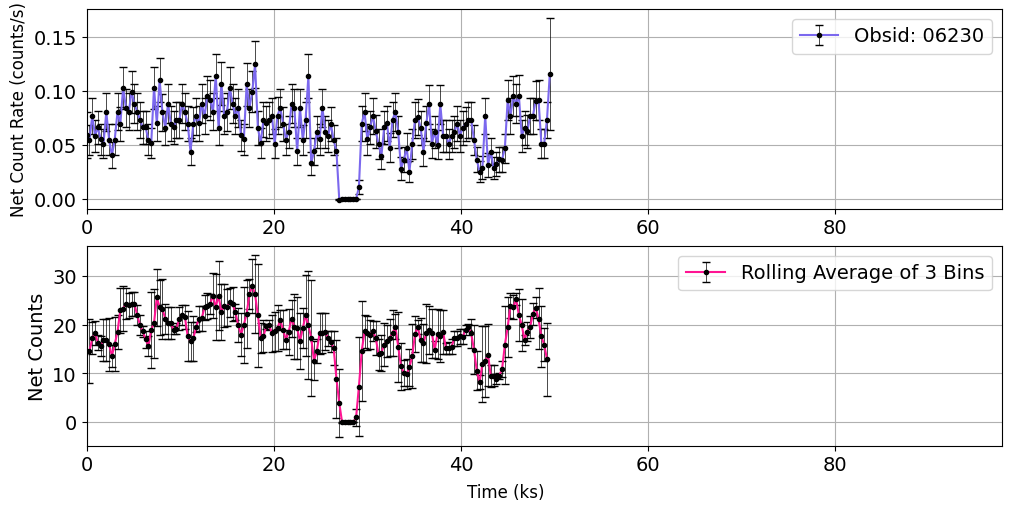

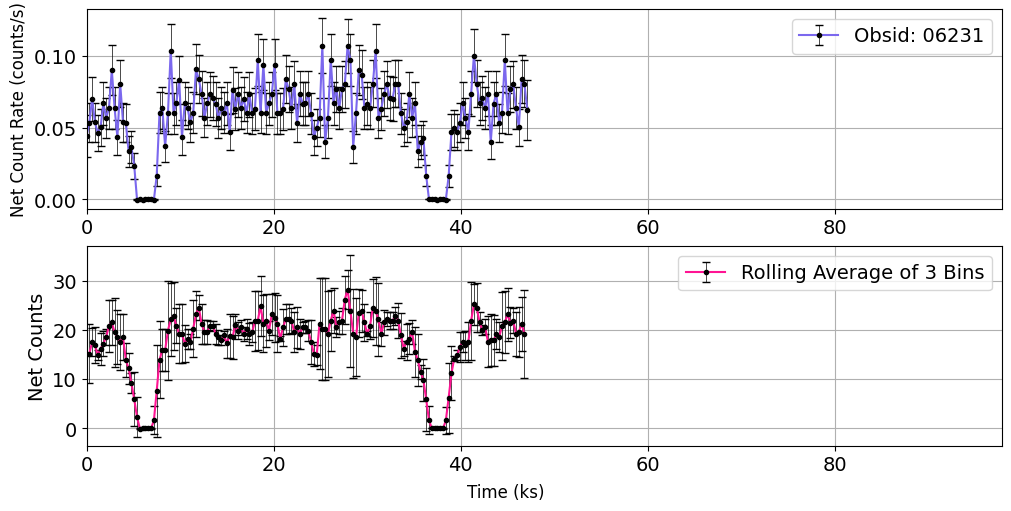

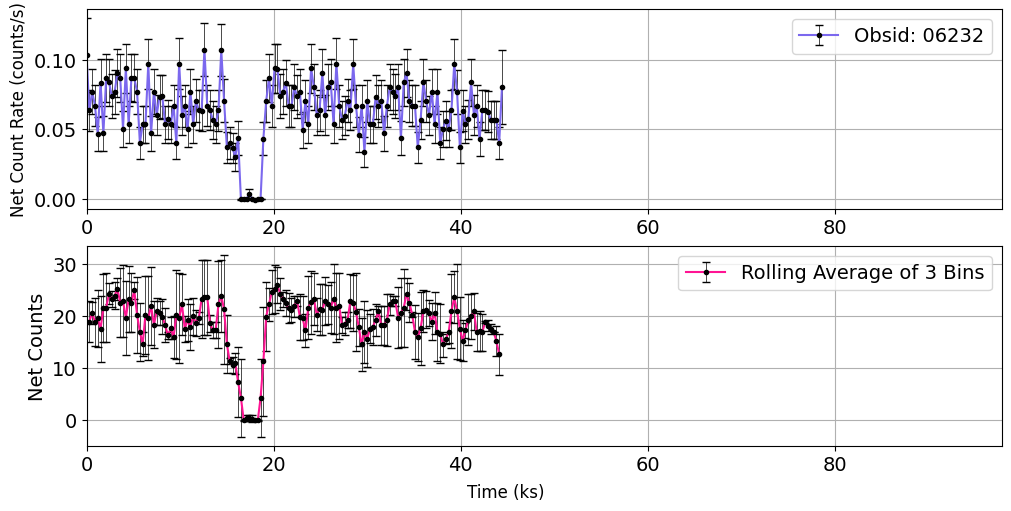

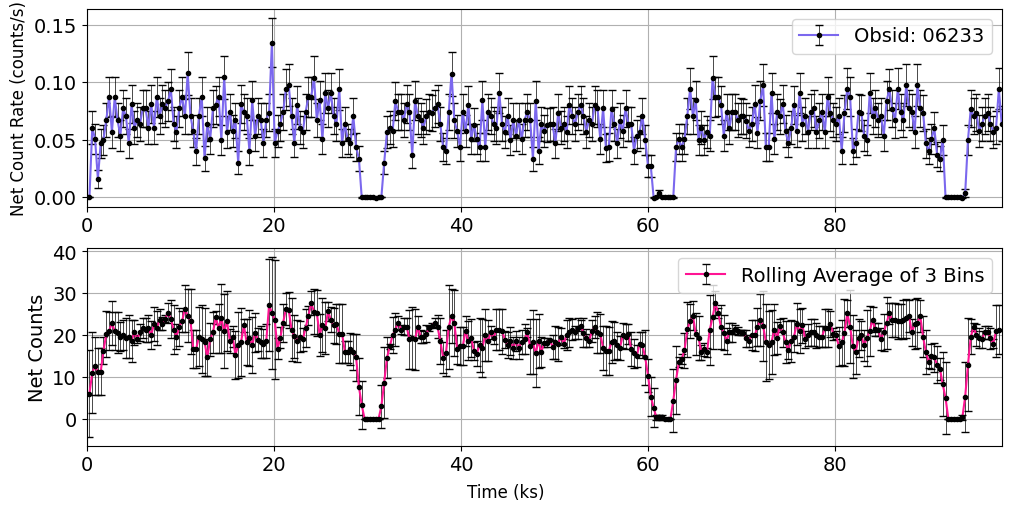

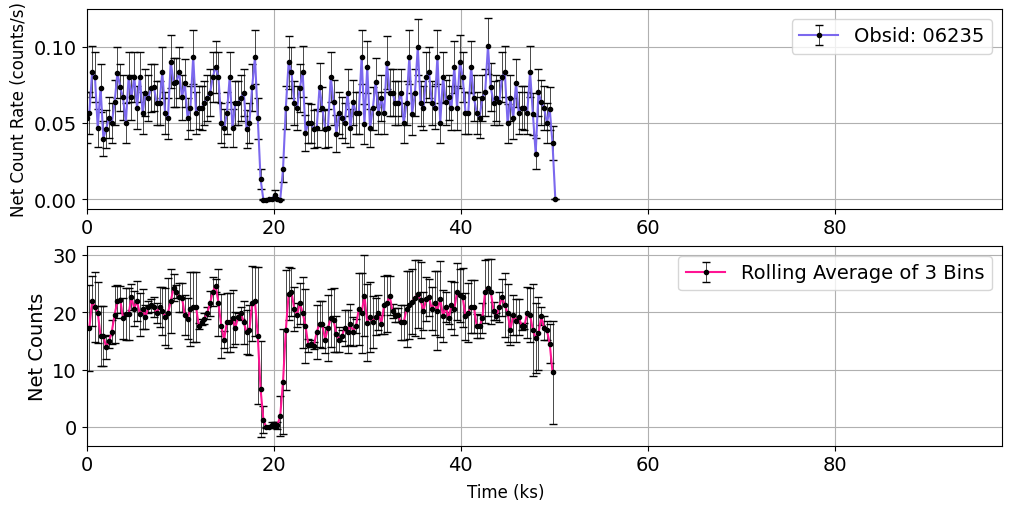

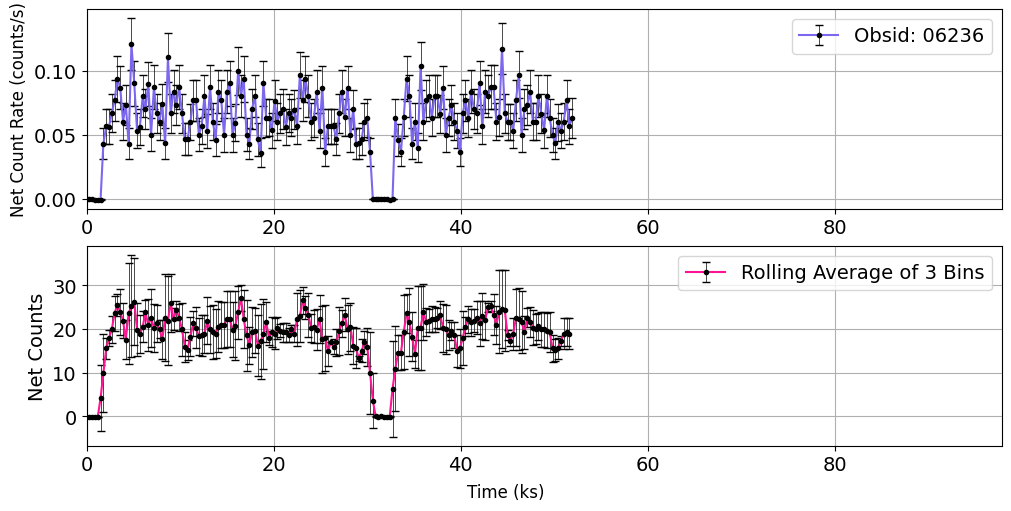

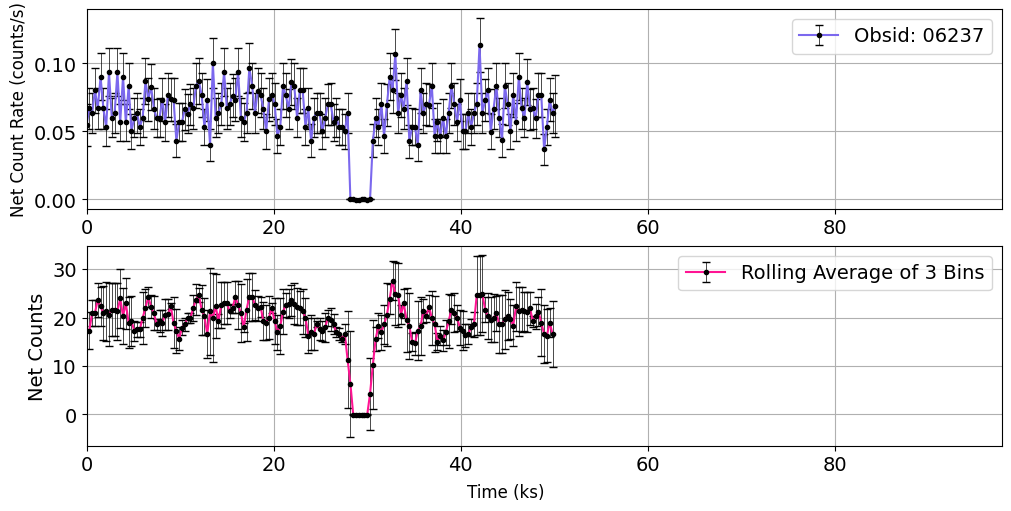

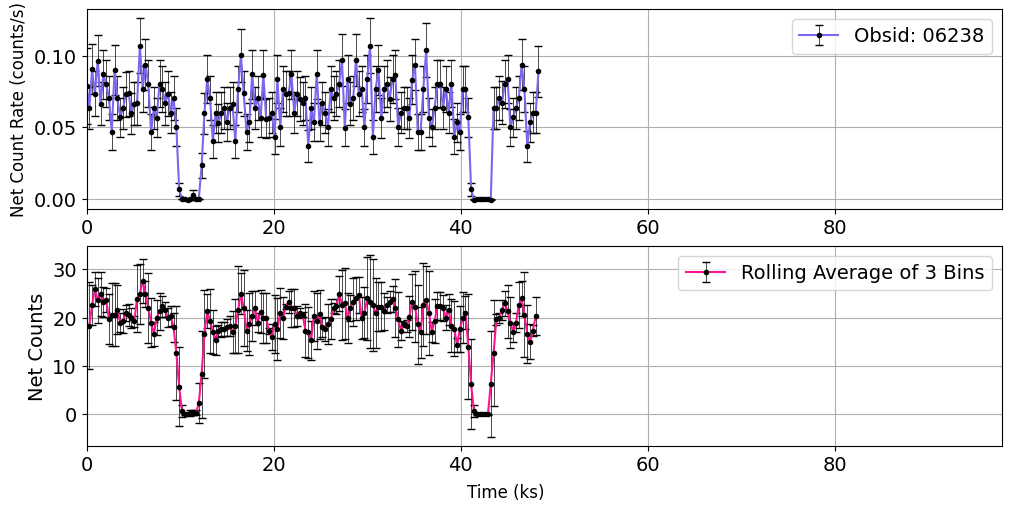

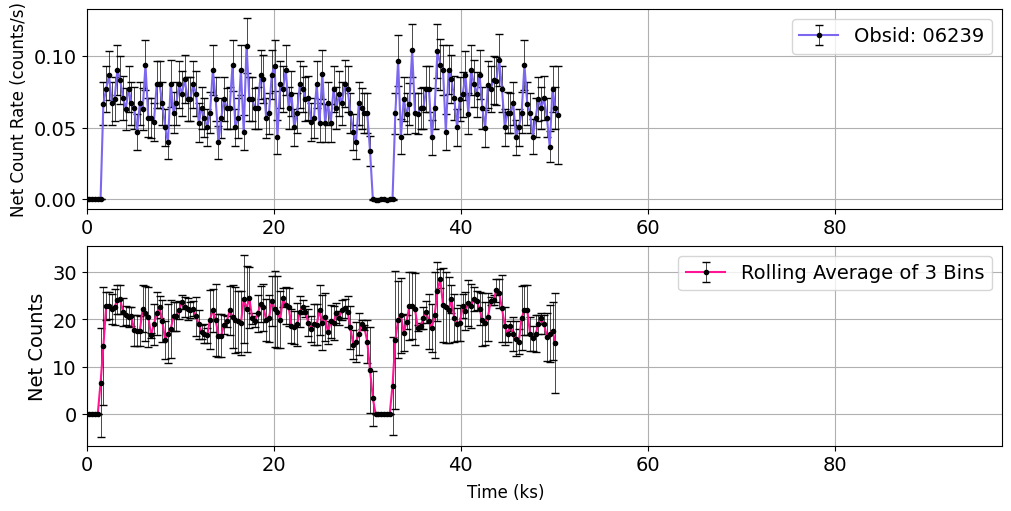

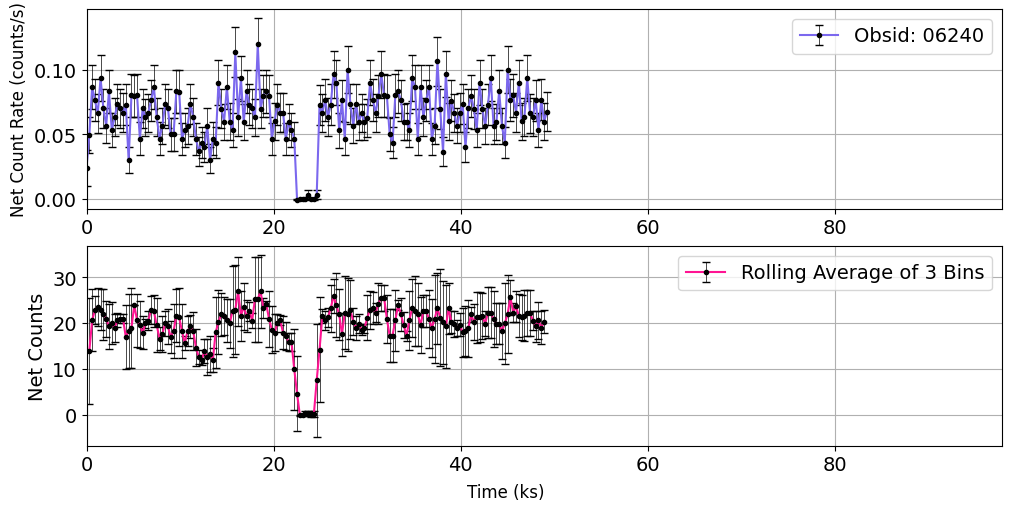

In [36]:
broad_files = sorted(glob.glob('./my_source/HRC_obs/*b.lc.txt'))
#bintime_files = sorted(glob.glob('./my_source/HRC_obs/*bintime.txt'))
#all_files = np.stack((broad_files), axis=1)
durations = []

for file in broad_files:
    broad_data = np.loadtxt(file)
    df = pd.DataFrame(broad_data)
    bd = df.loc[df[4] != 0]
    
    min_time = bd[0].min()
    max_time = bd[0].max()
    durations.append(max_time - min_time)
    
max_duration = max(durations)/1000

for file in broad_files:
    broad_data = np.loadtxt(file)
    df = pd.DataFrame(broad_data)
    bd = df.loc[df[4] != 0]
    
    min_time = bd[0].min()
    time_data = (bd[0] - min_time)/1000
    
    obsid = file[-30:-25]

    df = pd.DataFrame({'Time': time_data, 'Net Counts': bd[3]})
    df_rolling = df.rolling(window=3, center=True).mean()
    rolling_std = df.rolling(window=3, center=True).std()
    
    fig, axs = plt.subplots(2, 1, figsize=(10,5), constrained_layout = True)

    axs[0].errorbar(time_data, bd[1], yerr=bd[2], color = 'mediumslateblue', marker = 'o', markerfacecolor = 'black', elinewidth = 0.5, markersize = 3, ecolor = 'black', markeredgecolor = 'black', capsize=3)
    axs[0].set_xlim([0, max_duration])
    axs[0].set_ylabel('Net Count Rate (counts/s)', fontsize=12)
    axs[0].legend([f'Obsid: {obsid}'], loc='upper right', fontsize=14)
    axs[0].tick_params(axis='x', labelsize=14)
    axs[0].tick_params(axis='y', labelsize=14)
    axs[0].grid()
    #axs.set_xlim([0, 110])
    #axs.set_xticks(np.arange(0, len(time_data)+1, 10))

    axs[1].errorbar(time_data, df_rolling['Net Counts'], yerr=rolling_std['Net Counts'], color = 'deeppink', marker = 'o', elinewidth = 0.5, markerfacecolor = 'black', markersize = 3, ecolor = 'black', markeredgecolor = 'black', capsize=3)
    axs[1].set_xlim([0, max_duration])
    axs[1].set_ylabel('Net Counts', fontsize=14)
    axs[1].legend(['Rolling Average of 3 Bins'], loc='upper right', fontsize=14)
    axs[1].tick_params(axis='x', labelsize=14)
    axs[1].tick_params(axis='y', labelsize=14)
    axs[1].grid()

    #fig.supylabel('Count Rate (Counts/Second)')
    fig.supxlabel('Time (ks)')
    #fig.suptitle(f'HRC Lightcurve for ObsID {obsid}, with {bintime}s Bin size')
    plt.savefig(f'./my_source/HRC_{obsid}_paper_img.png', dpi=200, bbox_inches='tight')
    plt.show()    